<a href="https://colab.research.google.com/github/shubhankar77/EDA/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing essential libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Shubhankar/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
df.shape

(7043, 21)

In [8]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

# Box-plotting

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


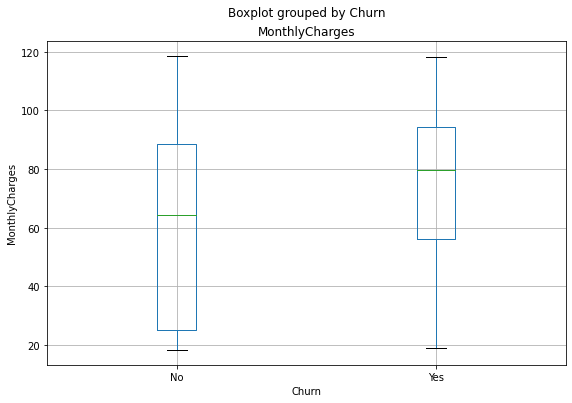

In [11]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
df.boxplot(column = 'MonthlyCharges', by = 'Churn' , ax =ax)
ax.set_ylabel('MonthlyCharges')
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


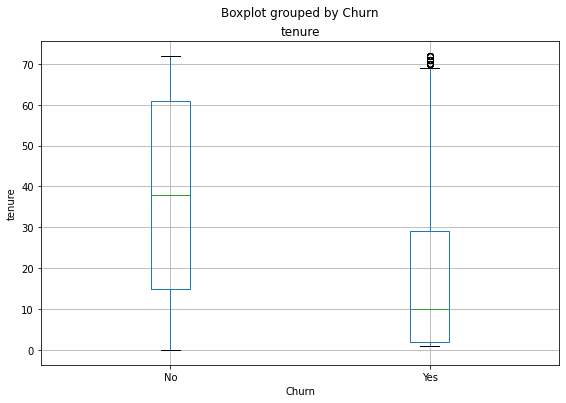

In [12]:
fig = plt.figure(figsize = (9,6))
ax = fig.gca()
df.boxplot(column = 'tenure', by = 'Churn' , ax =ax)
ax.set_ylabel('tenure')
plt.show()

In [13]:
df['class'] = df['Churn'].apply(lambda x : 1 if x == 'Yes' else 0)
x = df[['tenure','MonthlyCharges']].copy()
y = df[['class']].copy()

In [14]:
df['class'].head()

0    0
1    0
2    1
3    0
4    1
Name: class, dtype: int64

In [15]:
x.shape

(7043, 2)

In [16]:
y.shape

(7043, 1)

# Splitting the data into trained test




In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)
print(x_train.shape)
print(x_test.shape)

(5634, 2)
(1409, 2)


In [18]:
y_train.value_counts()

class
0        4113
1        1521
dtype: int64

# Fitting logistic regression on train data

In [19]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept = True , max_iter = 10000)
clf.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=10000)

In [20]:
clf.coef_

array([[-0.05474134,  0.03325319]])

In [21]:
clf.intercept_

array([-1.79926124])

###Evaluting the performance of the trained model

In [22]:
#get the predicted probabilityes
train_preds=clf.predict_proba(x_train)
test_preds=clf.predict_proba(x_test)

In [24]:
train_preds



array([[0.85827906, 0.14172094],
       [0.83766911, 0.16233089],
       [0.97123616, 0.02876384],
       ...,
       [0.45441597, 0.54558403],
       [0.52492189, 0.47507811],
       [0.60003051, 0.39996949]])

In [25]:
test_preds

array([[0.80033486, 0.19966514],
       [0.8815366 , 0.1184634 ],
       [0.72307447, 0.27692553],
       ...,
       [0.98000129, 0.01999871],
       [0.92456045, 0.07543955],
       [0.32407246, 0.67592754]])